In [2]:
from neurosynth.base.dataset import Dataset
from neurosynth.analysis import decode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['svg.fonttype'] = 'none'

C:\Users\Enigma\.conda\envs\Decoding\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
def getOrder(d, thr):
    dh = []
    for i in range(len(d)):
        di = d[i]
        if np.sum(di) == 0:
            dh.append(0)  # 或者一些其他的默认值，因为无法计算平均值
        else:
            dh.append(np.average(np.array(range(len(di))) + 1, weights=di))
    heatmapOrder = np.argsort(dh)
    return heatmapOrder


In [4]:
# # Create a new Dataset instance
# dataset = Dataset('database_feb_2015/database.txt')
# # Add some features
# dataset.add_features('database_feb_2015/features.txt')
# dataset.save('database_feb_2015/dataset.pkl')
#dataset
#OR
# Import neurosynth database:
pickled_dataset='database_feb_2015/dataset.pkl' 
dataset=Dataset.load(pickled_dataset)

In [5]:
# Analysis with 24 terms:
features = pd.read_csv('database_feb_2015/v3-topics-50.txt', sep='\t', index_col=0)
topics_to_keep = [ 1, 4,  6, 14, 
                  18, 19, 23, 25, 
                  20, 21, 27, 29,
                  30, 31, 33, 35, 
                  36, 38, 37, 41, 
                  44, 45, 48, 49]
labels = ['face/affective processing', ' verbal semantics', 'cued attention', 'working memory', 
          'autobiographical memory', 'reading', 'inhibition', 'motor', 
          'visual perception', 'numerical cognition', 'reward-based decision making', 'visual attention', 
          'multisensory processing', 'visuospatial','eye movements', 'action',
          'auditory processing', 'pain', 'language', 'declarative memory', 
          'visual semantics', 'emotion', 'cognitive control', 'social cognition']
features = features.iloc[:, topics_to_keep]
features.columns = labels
dataset.add_features(features, append=False)

# removed_as_noise = [0,5,9,12,17,40] # from 30 terms that were above threshold
# labels_noise = ['resting-state', 'dementia', 'development', 'misc', 'task timing', 'lateralization']

In [7]:
%pwd

'F:\\GSP_StructuralDecouplingIndex-16382be93c3bae8e196934a8e05b7a9300a909c3\\GSP_StructuralDecouplingIndex-16382be93c3bae8e196934a8e05b7a9300a909c3\\Code_NCOMMS\\Python'

ValueError: Format 'tiff' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

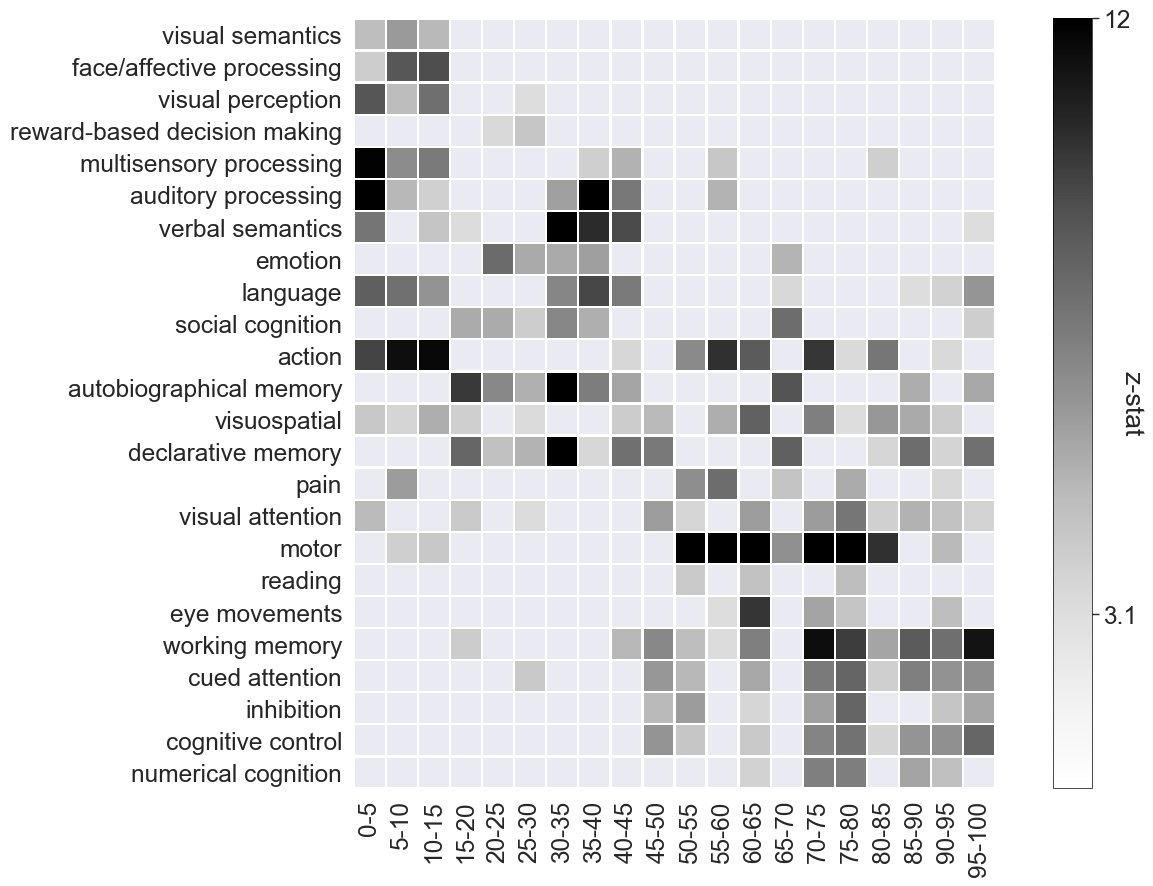

In [15]:
# Gradient 1

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
data = decoder.decode([str('Bins/Degree_%02d.nii' % (i)) 
                       for i in range(1,21)],save='decoding_results.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in range(0,100/tot)], save='decoding_results_Margulies.txt')
df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in range(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr,vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
f.savefig('degree_5_100.neurosynth.svg', format='svg')